In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data (adjust accordingly)
df_mrt = pd.read_excel('/content/drive/MyDrive/PYTHON_PRACTICE/Clustering/03_03.xlsx', sheet_name='mrt')
# df_mrt = df_mrt.rename(columns={i: f"mrt_{i}" for i in range(25)})
df_mrt

,x,y,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,0.25,0.25,23.866192,23.092770,22.430245,21.954403,21.722273,21.527366,21.549542,21.855416,...,31.777504,31.337045,30.809779,30.315391,29.488158,28.049794,26.681682,25.849260,25.195018,24.498469
1,0.25,0.75,23.836246,23.049927,22.389334,21.925890,21.704754,21.508992,21.556483,21.886821,...,32.190185,31.634341,31.091860,30.585608,29.702096,28.101400,26.685461,25.835563,25.171056,24.472778
2,0.25,1.25,23.908159,23.134892,22.475784,22.002136,21.767767,21.568330,21.599039,21.893981,...,32.109071,31.631715,31.121204,30.632865,29.764575,28.192156,26.759405,25.901815,25.237607,24.541371
3,0.25,1.75,23.972964,23.212677,22.554613,22.070565,21.823468,21.621077,21.636016,21.903388,...,31.981260,31.592514,31.116250,30.642252,29.792905,28.266210,26.822489,25.959696,25.296998,24.602716
4,0.25,2.25,24.019873,23.269471,22.611969,22.119785,21.863118,21.658787,21.660706,21.907484,...,31.860119,31.541720,31.092261,30.632767,29.803714,28.320340,26.867684,26.001017,25.339805,24.646896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,7.75,3.75,24.087443,23.352428,22.695104,22.189689,21.918741,21.713394,21.702558,21.941259,...,31.493446,31.047191,30.461346,29.930999,29.153225,27.945247,26.792295,26.033957,25.395251,24.708047
188,7.75,4.25,24.094978,23.362328,22.704490,22.196371,21.923177,21.718013,21.703973,21.939789,...,31.400661,30.979669,30.413383,29.901542,29.146725,27.963299,26.801041,26.040012,25.401998,24.714674
189,7.75,4.75,24.093475,23.361609,22.702887,22.193028,21.919135,21.714743,21.700390,21.935755,...,31.359254,30.945104,30.386730,29.889577,29.151595,27.977802,26.802592,26.038030,25.400482,24.712591
190,7.75,5.25,24.081488,23.349807,22.689610,22.178006,21.904506,21.701924,21.689177,21.925647,...,31.328789,30.919913,30.367468,29.886900,29.166520,27.995821,26.796894,26.025835,25.388908,24.699895


In [ ]:
# Melt to long format: x, y, time (as int), mrt
df_mrt_long = df_mrt.melt(id_vars=['x', 'y'],
                  value_vars=[col for col in df_mrt.columns],
                  var_name='time', value_name='mrt')

df_mrt_long

,x,y,time,mrt
0,0.25,0.25,0,23.866192
1,0.25,0.75,0,23.836246
2,0.25,1.25,0,23.908159
3,0.25,1.75,0,23.972964
4,0.25,2.25,0,24.019873
...,...,...,...,...
4603,7.75,3.75,23,24.708047
4604,7.75,4.25,23,24.714674
4605,7.75,4.75,23,24.712591
4606,7.75,5.25,23,24.699895


In [ ]:
# Calculating median mrt at each hour
median_mrt = df_mrt_long.groupby('time')['mrt'].median().to_dict()

# Create a new column with the corresponding hourly median MRT
df_mrt_long['hourly_median'] = df_mrt_long['time'].map(median_mrt)

# Calculate the absolute difference
df_mrt_long['diff'] = abs(df_mrt_long['mrt'] - df_mrt_long['hourly_median'])

# Filter rows with diff <= 2.8
df_filtered = df_mrt_long[df_mrt_long['diff'] >= 2.8].copy()

# drop helper columns
df_filtered.drop(columns=['hourly_median', 'diff'], inplace=True)

df_filtered

,x,y,time,mrt
1968,2.25,0.25,10,27.647167
2124,0.75,0.25,11,31.074469
2136,1.25,0.25,11,31.520870
2148,1.75,0.25,11,31.609615
2160,2.25,0.25,11,31.622888
...,...,...,...,...
2833,6.25,0.75,14,34.647741
2844,6.75,0.25,14,39.239628
2845,6.75,0.75,14,34.614118
2856,7.25,0.25,14,38.864523


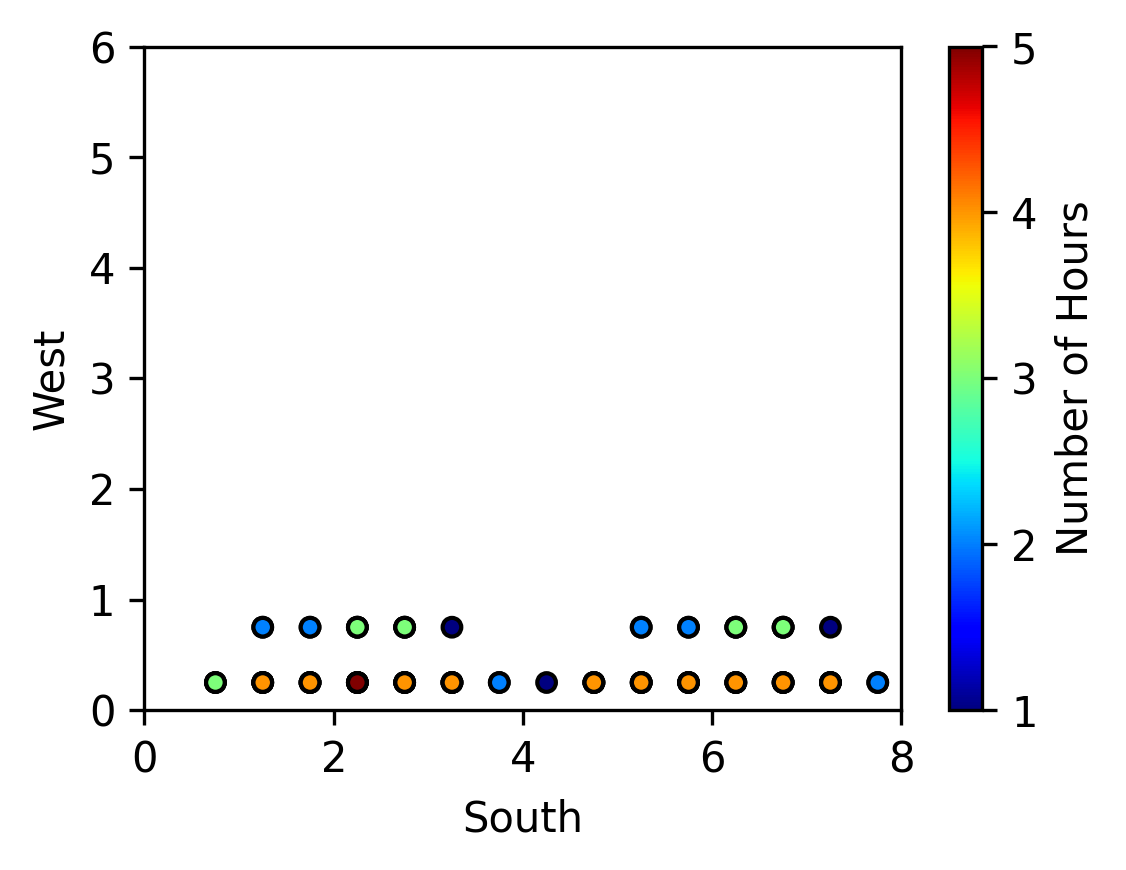

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each (x, y) point
point_counts = df_filtered.groupby(['x', 'y']).size().reset_index(name='count')

# Merge back to get count per point
df_with_counts = df_filtered.merge(point_counts, on=['x', 'y'])

# Plot with color based on 'count'
plt.figure(figsize=(4, 3), dpi=300)
scatter = plt.scatter(df_with_counts['x'], df_with_counts['y'], c=df_with_counts['count'],
                      cmap='jet', s=20, edgecolor='k')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Hours')

plt.xlabel('South')
plt.ylabel('West')
plt.grid(False)

# Optional: Set axis limits to better fit your data range
plt.xlim(0, 8)
plt.ylim(0, 6)

plt.tight_layout()
plt.show()
